In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_dir=r'C:\Users\Abinaya Venkatesh\Desktop\Kamalaveni\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\train'
test_dir=r'C:\Users\Abinaya Venkatesh\Desktop\Kamalaveni\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test'

In [10]:
## generating batches of tensor image data 

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='categorical')  ##use "class_mode=categorical" for multiple classes


Found 5384 images belonging to 6 classes.


In [11]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

## this should be a general practice that the image size decreases as we move deep in the NN and 
## the filter and because of them the feature generated should increase


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model_history=model.fit_generator(
        train_generator,
        steps_per_epoch=100,   ## no. of images(2000)/batch size(20)
        epochs=20,
         ##no. of images in validation set(1000)/batch_size(20)
)

C:\Users\Abinaya Venkatesh\AppData\Local\Temp\ipykernel_10116\1354879674.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/20
100/100 [==============================] - 131s 1s/step - loss: 0.4552 - accuracy: 0.8267
Epoch 2/20
100/100 [==============================] - 100s 1s/step - loss: 0.4506 - accuracy: 0.8333
Epoch 3/20
100/100 [==============================] - 76s 757ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 4/20
100/100 [==============================] - 77s 766ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 5/20
100/100 [==============================] - 78s 770ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 6/20
100/100 [==============================] - 78s 776ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 7/20
100/100 [==============================] - 80s 802ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 8/20
100/100 [==============================] - 85s 852ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 9/20
100/100 [==============================] - 83s 831ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 10/20
100/100 [==============================] - 82s 822ms/step - loss:

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

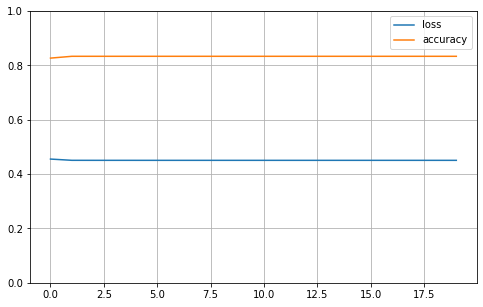

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
## save the model 

model.save('FruitImage_classification_CNN.h5')